## 最低级的过采样会导致过拟合

In [1]:
import pandas as pd, numpy as np
import os
import math
from math import ceil, floor, log
import random

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

from yellowbrick.classifier import ClassificationReport
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import catboost
print(catboost.__version__)
from catboost import *
from catboost import datasets
from catboost import CatBoostClassifier

0.24.2
/home/haojie/anaconda3/lib/python3.6/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('data/train_clean_v1.csv')
test = pd.read_csv('data/tmp_clean_v1.csv')

In [5]:
df_train_target = df_train['Response']
df_train_x = df_train.drop(['Response'], axis=1)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(df_train_x, df_train_target, test_size = 0.33, random_state=40)
train_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200211,0,0.569231,1,8,1,1.914373,0.384083,0,0,0,0,0,0,0,0,0,0,0
137031,1,0.384615,1,14,1,-1.623761,0.733564,0,0,0,0,0,1,0,0,0,0,0
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0


In [7]:
train_x.loc[:, 'Response'] = train_y
train_x


/home/haojie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/haojie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Response
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0,1
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200211,0,0.569231,1,8,1,1.914373,0.384083,0,0,0,0,0,0,0,0,0,0,0,0
137031,1,0.384615,1,14,1,-1.623761,0.733564,0,0,0,0,0,1,0,0,0,0,0,0
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0,1
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0,1


In [8]:
train_1 = train_x.loc[train_x['Response']==1]
train_1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Response
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0,1
106568,1,0.723077,1,28,0,-0.335480,0.847751,0,0,1,0,0,1,0,0,0,0,0,1
275974,0,0.200000,1,43,0,-0.188816,0.785467,0,0,1,0,0,1,0,0,0,0,0,1
274262,0,0.276923,1,8,0,-0.159681,0.519031,0,0,1,0,0,0,0,0,0,0,0,1
265947,0,0.307692,1,41,0,0.265946,0.747405,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,0.061538,1,18,0,0.307991,0.920415,1,0,1,0,0,0,0,1,0,0,0,1
244554,1,0.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0,1
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0,1
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0,1


In [9]:
train = train_x.copy()
for i in range(7):
    train = pd.concat([train, train_1])
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Response
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0,1
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,0.061538,1,18,0,0.307991,0.920415,1,0,1,0,0,0,0,1,0,0,0,1
244554,1,0.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0,1
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0,1
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0,1


In [10]:
train_y = train['Response']
train_x = train.drop(['Response'], axis=1)

In [11]:
train_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,0.061538,1,18,0,0.307991,0.920415,1,0,1,0,0,0,0,1,0,0,0
244554,1,0.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0


In [12]:
test_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
62761,0,0.076923,1,28,1,-0.402939,0.941176,1,0,0,1,0,0,0,0,0,0,0
99685,0,0.123077,1,41,1,0.135042,0.871972,1,0,0,1,0,0,0,0,0,0,0
220460,1,0.384615,1,28,0,0.350211,0.937716,0,0,1,0,0,1,0,0,0,0,0
56346,1,0.338462,1,28,1,0.877607,0.882353,0,0,0,0,0,0,0,0,0,0,0
270589,0,0.200000,1,18,0,-0.195097,0.200692,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51243,1,0.369231,1,20,1,-1.623761,0.477509,0,0,0,0,1,0,0,0,0,0,0
198142,1,0.446154,1,28,0,0.083925,0.993080,0,0,1,0,0,1,0,0,0,0,0
199461,1,0.400000,1,28,0,0.880341,0.830450,0,0,1,0,1,0,0,0,0,0,0
205309,0,0.015385,1,50,1,0.217853,0.657439,1,0,0,1,0,0,0,0,0,0,0


In [13]:
XGB_model_u = XGBClassifier(random_state = 10, max_depth = 8, 
                            n_estimators = 300, reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, njobs = -1,
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

In [14]:
test_y

62761     0
99685     0
220460    0
56346     0
270589    1
         ..
51243     0
198142    1
199461    0
205309    0
138107    0
Name: Response, Length: 100614, dtype: int64

In [15]:
XGB_model_u.fit(train_x, train_y)
XGB_preds_u = XGB_model_u.predict_proba(test_x)
XGB_score_u = roc_auc_score(test_y, XGB_preds_u[:,1])
XGB_class_u = XGB_model_u.predict(test_x)

[23:40:04] WARNING: ../src/learner.cc:516: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




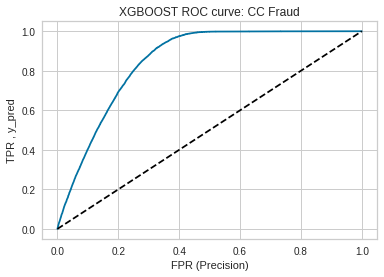

Area under curve (AUC):  0.8489149054007561


In [21]:
(fpr, tpr, thresholds) = roc_curve(test_y, XGB_preds_u[:,1])
plt.title('XGBOOST ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [22]:
valid_y = test['Response']
valid_x = test.drop(['Response'], axis=1)
valid_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
0,1,0.328125,1,6,0,0.336961,0.377163,0,0,1,0,0,1,0,0,0,0,0
1,0,0.125000,1,28,1,0.811089,0.280277,1,0,0,1,0,0,0,0,0,0,0
2,0,0.187500,1,8,0,0.360106,0.252595,0,0,1,0,0,1,0,0,0,0,0
3,1,0.250000,1,28,1,-0.031278,0.910035,0,0,0,0,0,0,0,0,1,0,0
4,0,0.187500,1,15,0,0.440651,0.993080,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76216,0,0.406250,1,3,0,0.005754,0.477509,0,1,1,0,1,0,0,0,0,0,0
76217,0,0.265625,1,0,0,-1.619267,0.460208,0,0,0,0,0,0,0,0,0,0,0
76218,1,0.203125,1,49,1,0.170026,0.889273,1,0,0,1,0,0,0,0,0,0,0
76219,1,0.812500,1,28,0,0.212266,0.948097,0,1,1,0,0,1,0,0,0,0,0


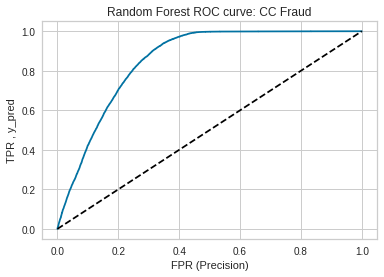

Area under curve (AUC):  0.8517161393868588


In [23]:
y_score = XGB_model_u.predict_proba(valid_x)[:,1]
fpr, tpr, _ = roc_curve(valid_y, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [19]:
train_target = train['Response']
train_raw_x = train.drop(['Response'], axis=1)
train_target

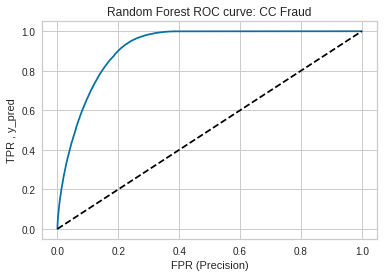

Area under curve (AUC):  0.9171355892464013


In [24]:
y_score = XGB_model_u.predict_proba(train_x)[:,1]
fpr, tpr, _ = roc_curve(train_y, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## SMOTE过采样

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,0.061538,1,18,0,0.307991,0.920415,1,0,1,0,0,0,0,1,0,0,0
244554,1,0.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0


In [31]:
train_x, test_x, train_y, test_y = train_test_split(df_train_x, df_train_target, test_size = 0.33, random_state=40)

In [33]:
train_x.loc[:, 'Response'] = train_y
train = train_x.copy()
train_up = train_x.copy()

/home/haojie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [37]:
def upsample(df, u_feature, n_upsampling):
    ones = df.copy()
    for n in range(n_upsampling):
        if u_feature == 'Annual_Premium':
            df[u_feature] = ones[u_feature].apply(lambda x: x + random.randint(-1,1)* x *0.05) # change Annual_premiun in the range of 5%
        elif u_feature == 'Age':
            df[u_feature] = ones[u_feature].apply(lambda x: x + random.randint(-5,5)) # change Age in the range of 5 years
        elif u_feature == 'Vintage':
            df[u_feature] = ones[u_feature].apply(lambda x: x + random.randint(-1,1)* x *0.01)
                
        if n == 0:
            df_new = df.copy()
        else:
            df_new = pd.concat([df_new, df])
    return df_new


In [39]:
train_1 = train_up.loc[train_up['Response']==1]
train_1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Response
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0,1
106568,1,0.723077,1,28,0,-0.335480,0.847751,0,0,1,0,0,1,0,0,0,0,0,1
275974,0,0.200000,1,43,0,-0.188816,0.785467,0,0,1,0,0,1,0,0,0,0,0,1
274262,0,0.276923,1,8,0,-0.159681,0.519031,0,0,1,0,0,0,0,0,0,0,0,1
265947,0,0.307692,1,41,0,0.265946,0.747405,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,0.061538,1,18,0,0.307991,0.920415,1,0,1,0,0,0,0,1,0,0,0,1
244554,1,0.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0,1
142604,0,0.307692,1,28,0,2.080576,0.771626,0,0,1,0,0,1,0,0,0,0,0,1
114369,1,0.369231,1,50,0,0.499608,0.069204,0,0,1,0,0,1,0,0,0,0,0,1


In [41]:
df_ext_age = upsample(train_1, 'Age', 1)
df_ext_vin = upsample(train_1, 'Age', 1)
df_ext_ann = upsample(train_1, 'Annual_Premium', 1)

train_up = pd.concat([train_up, df_ext_age])
train_up = pd.concat([train_up, df_ext_vin])
train_up = pd.concat([train_up, df_ext_ann])
train_up

/home/haojie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/haojie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Response
158194,0,0.307692,1,28,0,0.248558,0.975779,0,0,1,0,1,0,0,0,0,0,0,0
56656,1,0.061538,1,41,1,0.178076,0.325260,1,0,0,1,0,0,0,0,0,0,0,0
295135,0,0.723077,1,28,0,1.266017,0.612457,0,0,0,0,1,0,0,0,0,0,0,0
89244,1,0.138462,1,29,0,-0.066286,0.041522,0,0,1,0,0,1,0,0,0,0,0,1
236647,0,0.507692,1,41,1,0.102999,0.432526,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141367,1,9.061538,1,18,0,0.323391,0.920415,1,0,1,0,0,0,0,1,0,0,0,1
244554,1,7.276923,1,32,0,-1.623761,0.114187,0,0,1,0,0,1,0,0,0,0,0,1
142604,0,-2.692308,1,28,0,1.976548,0.771626,0,0,1,0,0,1,0,0,0,0,0,1
114369,1,7.369231,1,50,0,0.474628,0.069204,0,0,1,0,0,1,0,0,0,0,0,1


In [42]:
train_y = train_up['Response']
train_x = train_up.drop(['Response'], axis=1)
train_y.value_counts()

0    179367
1     99628
Name: Response, dtype: int64

In [45]:
XGB_model_u2 = XGBClassifier(random_state = 40, max_depth = 8, 
                            n_estimators = 1000, reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

In [46]:
XGB_model_u2.fit(train_x, train_y)
XGB_preds_u2 = XGB_model_u2.predict_proba(test_x)
XGB_score_u2 = roc_auc_score(test_y, XGB_preds_u2[:,1])
XGB_class_u2 = XGB_model_u2.predict(test_x)

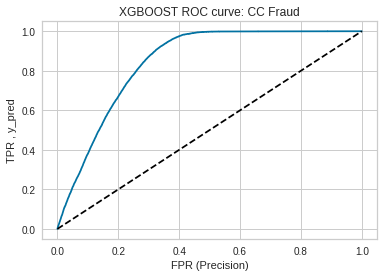

Area under curve (AUC):  0.8433628712440295


In [48]:
(fpr, tpr, thresholds) = roc_curve(test_y, XGB_preds_u2[:,1])
plt.title('XGBOOST ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

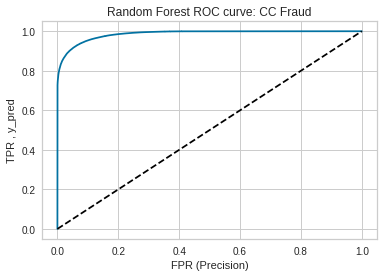

Area under curve (AUC):  0.9860995022721989


In [52]:
y_score = XGB_model_u2.predict_proba(train_x)[:,1]
fpr, tpr, _ = roc_curve(train_y, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

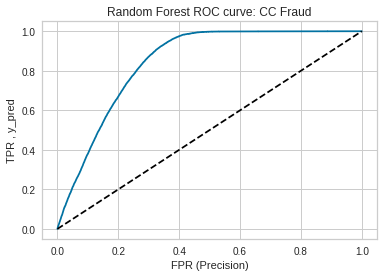

Area under curve (AUC):  0.8433628712440295


In [54]:
y_score = XGB_model_u2.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

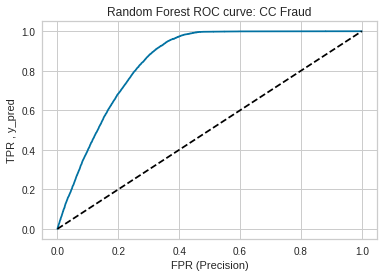

Area under curve (AUC):  0.8468838199381248


In [56]:
y_score = XGB_model_u2.predict_proba(valid_x)[:,1]
fpr, tpr, _ = roc_curve(valid_y, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))